# Introduction to Persistent Homology

In [2]:
#libraries maths
import math
import scipy
import numpy  as np
import pandas as pd
from ripser import Rips

#libraries plot
import matplotlib.pyplot as plt
import seaborn as sns
from   mpl_toolkits.mplot3d import Axes3D 
from   matplotlib           import animation, rc

#libraries display
import sys
from IPython.display import HTML
from IPython.display import clear_output

#library with the generators of datasets
from utils import *

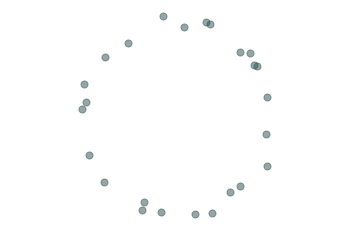

In [7]:
'Generate dataset'

X = generateCircle(N_signal = 25, sd = 0.2)

plt.scatter(X[:,0], X[:,1], s = 50, alpha=0.5, color = 'darkslategray')
plt.axis('equal');
plt.axis('off');

In [8]:
'Create the animationCircle function'

def animationCircle(i):
    clear_output(wait=True)
    print ('Iteration %i'%i+' over %i'%number_frames+'.')
    sys.stdout.flush()

    ax.clear()
    ax.axis('off')
    r = radii[i]
    #plot a disk around each point
    for j in range(np.shape(X)[0]):
        circle = plt.Circle((X[j,0], X[j,1]), r, color='indianred', alpha = .3)
        circle2 = plt.Circle((X[j,0], X[j,1]), r, color='indianred', alpha = .8, fill=False)
        ax.add_artist(circle)
        ax.add_artist(circle2)
    #plot the points (center of the disks)
    for j in range(np.shape(X)[0]):
        point = plt.Circle((X[j,0], X[j,1]), .03, facecolor='darkslategrey', edgecolor = 'darkslateblue', alpha = 0.7)
        ax.add_artist(point)
        
    ax.set_xlim(-2.2,2.2)
    ax.set_ylim(-2.2,2.2)

In [57]:
'Video parameters'

FPS = 10                     #frames per second
DPI = 100                    #quality of the video
time = 2                     #duration of the video
number_frames = time*FPS     #number of frames

radii = np.linspace(0,1,number_frames)    #radii used in the filtration


Iteration 0 over 100.


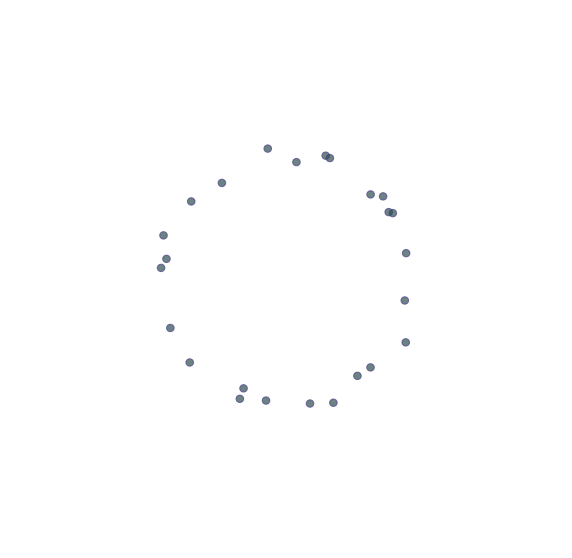

In [39]:
'Generate the animation'

fig = plt.figure( figsize=(10,10) )     #define the figure
ax = fig.add_subplot(1, 1, 1)           #define the axis
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.axis('off')
fig.add_axes(ax)


anim = animation.FuncAnimation(fig, animationCircle,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

' Display the animation in the notebook '

HTML(anim.to_html5_video()) 

In [40]:
HTML(anim.to_html5_video()) 

In [93]:
'Create the animationRips function'

distance = distance_matrix(X,X)

def animationRips(i):
    clear_output(wait=True)
    print ('Iteration %i'%i+' over %i'%number_frames+'.')
    sys.stdout.flush()

    ax.clear()
    ax.axis('off')
    r = radii[i]

    
    #plot a disk around each point
    for j in range(np.shape(X)[0]):
        circle = plt.Circle((X[j,0], X[j,1]), r, color='indianred', alpha = .2)
        circle2 = plt.Circle((X[j,0], X[j,1]), r, color='indianred', alpha = .5, fill=False)
        ax.add_artist(circle)
        ax.add_artist(circle2)
    
    #plot triangles
    for j in range(np.shape(X)[0]):
        for k in range(j, np.shape(X)[0]):
            for t in range(k, np.shape(X)[0]):
                if (distance[j,k]<2*r)&(distance[j,t]<2*r)&(distance[k,t]<2*r):
                    triangle = plt.Polygon([X[j,:], X[k,:], X[t,:]], color='grey', alpha = 0.03)
                    ax.add_artist(triangle)
    
    #plot the points (center of the disks)
    for j in range(np.shape(X)[0]):
        point = plt.Circle((X[j,0], X[j,1]), .03, facecolor='darkslategrey', edgecolor = 'darkslateblue', alpha = 0.7)
        ax.add_artist(point)
        
                    
    #plot edges 
    for j in range(np.shape(X)[0]):
        for k in range(j, np.shape(X)[0]):
            if distance[j,k]<2*r:
                plt.plot([X[j,0], X[k,0]], [X[j,1], X[k,1]], c = 'darkslategrey', alpha = 0.9)
                #ax.add_artist(edge)
    
        
    ax.set_xlim(-2.2,2.2)
    ax.set_ylim(-2.2,2.2)

Iteration 0 over 100.


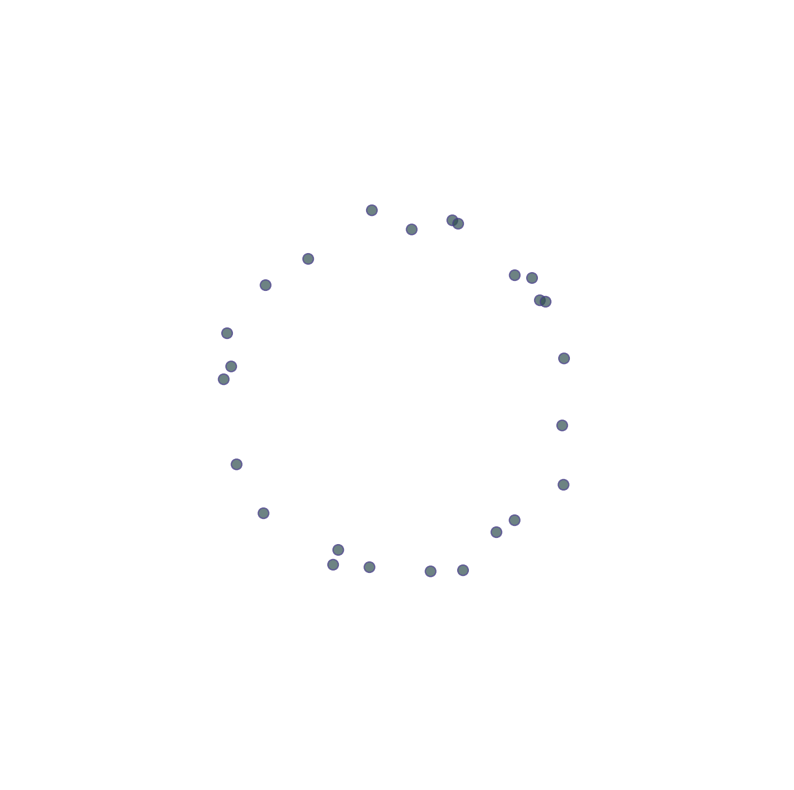

In [94]:
'Generate the animation'

fig = plt.figure( figsize=(10,10) )     #define the figure
ax = fig.add_subplot(1, 1, 1)           #define the axis
ax.set_xlim(-2.5,2.5)
ax.set_ylim(-2.5,2.5)
ax.xaxis.set_tick_params(labelsize=0)
ax.yaxis.set_tick_params(labelsize=0)
ax.set_axis_off()
fig.add_axes(ax)

anim = animation.FuncAnimation(fig, animationRips,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

HTML(anim.to_html5_video())

In [95]:
' Display the animation in the notebook '
HTML(anim.to_html5_video())

In [96]:
#anim.save('animations/filtration_circle.gif',writer='imagemagick',fps=FPS, dpi = DPI)

In [238]:
'Create the animationPBarcode function'

def animationPBArcode(i):
    clear_output(wait=True)
    print ('Iteration %i'%i+' over %i'%number_frames+'.')
    sys.stdout.flush()

    ax.clear()
    r = radii[i]
    
    #plot persistence barcode
    Rips_complex = gd.RipsComplex(X, max_edge_length=r) 
    Rips_simplex_tree = Rips_complex.create_simplex_tree(max_dimension=2) 
    diag_Rips = Rips_simplex_tree.persistence()
    gd.plot_persistence_barcode(diag_Rips, axes = ax)
     
    ax.set_xlim(-0.01,1.5)
    ax.set_ylim(-0.01,25)

In [239]:
'Video parameters'

FPS = 40                     #frames per second
DPI = 100                    #quality of the video
time = 2                     #duration of the video
number_frames = time*FPS     #number of frames

radii = np.linspace(0,2,number_frames)    #radii used in the filtration

Iteration 0 over 80.


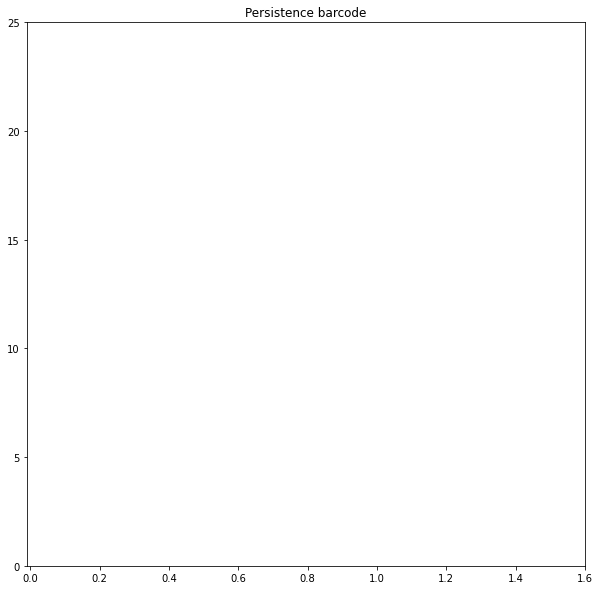

In [240]:
'Generate the animation'

fig = plt.figure( figsize=(10,10) )     #define the figure
ax = fig.add_subplot(1, 1, 1)           #define the axis
ax.set_xlim(-0.01,1.6)
ax.set_ylim(-0.01,25)
fig.add_axes(ax)

anim = animation.FuncAnimation(fig, animationPBarcode,
                               frames=number_frames,
                               interval=350,
                               blit=False,
                               repeat=False)

' Display the animation in the notebook '

HTML(anim.to_html5_video())

In [241]:
HTML(anim.to_html5_video()) 

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


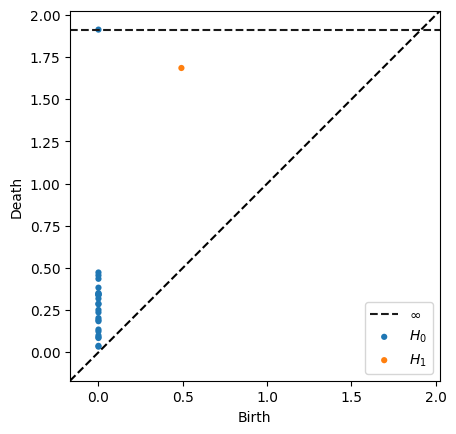

In [92]:
'The persistence diagram'

rips = Rips(maxdim = 1)
dgms = rips.fit_transform(X)
rips.plot(dgms);